# Descriptive Statistics with Python

**df.describe()** Quick statistics by column

In [39]:
import numpy as np
import pandas as pd

dataframe = pd.read_excel("all_data_M_2021.xlsx")

In [45]:
dataframe.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,22,32.98,49.43,23980,29950,45760,68590,102810,NaN,NaN
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,49.25,77.39,#,47860,74710,102450,160960,#,NaN,NaN
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,47.46,77.18,#,41260,60900,98720,160540,#,NaN,NaN
3,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,86.31,#,#,60300,111080,179520,#,#,NaN,NaN
4,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,86.31,#,#,60300,111080,179520,#,#,NaN,NaN


In [46]:
number_of_rows = len(dataframe)
print(f'Dataframe has {number_of_rows} rows.')

Dataframe has 406359 rows.


In [47]:
dataframe.describe()

,AREA,AREA_TYPE,OWN_CODE
count,4.063590e+05,406359.000000,406359.000000
mean,3.793228e+05,2.770954,719.863761
std,1.136646e+06,1.780532,601.390547
min,1.000000e+00,1.000000,1.000000
25%,9.900000e+01,1.000000,5.000000
50%,9.900000e+01,2.000000,1235.000000
75%,3.710000e+04,4.000000,1235.000000
max,7.800001e+06,6.000000,1235.000000


In [40]:
columns_to_modify = ['H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 
                     'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 
                     'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 
                     'A_PCT90'
                    ]

# Splits columns by number type wanted
int_columns = ['A_MEAN', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90']
float_columns = ['H_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90']

# Initialize dict of column and its type
dict_column_and_type = {}

# Attach column name with the data type
for column_name in columns_to_modify:
    if column_name in int_columns:
        # 'Int64' is needed when mixing ints with pandas.NA
        dict_column_and_type[column_name] = 'Int64'
    else:
        # 'Float64' is needed when mixing floats with pandas.NA
        dict_column_and_type[column_name] = 'Float64'
        
# To use .apply, we want the input of the definition to be the value in the table
def remove_commas(text):
    return text.replace(",", "")

def replace_symbols(text):
    # pandas.NA is Not a Number
    new_text = text.replace("*", pd.NA)
    new_text = new_text.replace("#", pd.NA)
    new_text = new_text.replace(np.nan, pd.NA)
    return new_text

In [48]:
# Initialize our sanitized dataframe
sanitized_df = dataframe

# Apply our two functions
sanitized_df[columns_to_modify] = sanitized_df[columns_to_modify].apply(remove_commas)
sanitized_df[columns_to_modify] = sanitized_df[columns_to_modify].apply(replace_symbols)

# Using the dictonary, we cast each column as its associated data type
sanitized_df = sanitized_df.astype(dict_column_and_type)

In [49]:
sanitized_df.describe()

,AREA,AREA_TYPE,OWN_CODE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
count,4.063590e+05,406359.000000,406359.000000,387288.0,402479.0,403547.0,387284.0,386523.0,384455.0,380802.0,371688.0,402475.0,401708.0,399589.0,395770.0,386099.0
mean,3.793228e+05,2.770954,719.863761,29.400817,61579.65387,3.857497,18.226222,21.910987,26.872098,32.894307,38.769704,38099.846152,45869.060113,56326.020736,69012.367233,81339.466432
std,1.136646e+06,1.780532,601.390547,16.768382,34718.364718,3.939209,8.687701,10.886613,13.429379,16.303925,18.63422,18014.101597,22588.006339,27928.532541,33977.152314,38881.533619
min,1.000000e+00,1.000000,1.000000,8.0,16650.0,0.0,7.25,7.25,7.44,8.08,8.08,15080.0,15080.0,15480.0,16810.0,16810.0
25%,9.900000e+01,1.000000,5.000000,18.43,38650.0,1.4,13.04,14.32,17.68,21.81,23.46,27290.0,29820.0,36890.0,45820.0,49140.0
50%,9.900000e+01,2.000000,1235.000000,24.66,52030.0,2.6,15.08,18.27,22.97,28.96,35.21,32050.0,38210.0,48040.0,60550.0,74490.0
75%,3.710000e+04,4.000000,1235.000000,35.4,74380.0,4.9,22.3,26.29,31.91,39.25,48.46,46810.0,56700.0,69440.0,82640.0,101210.0
max,7.800001e+06,6.000000,1235.000000,197.71,411230.0,29.9,99.92,99.95,99.98,99.98,99.99,207830.0,207900.0,207950.0,207960.0,207980.0


## Common Statistics on Dataframes
- **df.count()**  Number of non-NA observations
- **df.sum()**    Sum total of values
- **df.mean()**   Average value (calculated as summing all values, then dividing by number of values)
- **df.median()** Center value (calculated by organizing values from smallest to largest, then returning middle of list)
- **df.min()**    Minimum value
- **df.max()**    Maximum value
- **df.std()**    Standard deviation (amount of dispersement of data from mean)
- **df.corr()**   Pairwise correlation of columns (linear relation between two columns of data)

**Notes:**
- To run statistics on all ROWS, include the argument *axis=1*. The argument *axis=0* is set by default to run statistics on columns.
- To INCLUDE missing data, add the argument *skipna=False*. The argument *skipna=True* is set by default. 

In [50]:
print(f"Median for H_MEAN column: {sanitized_df['H_MEAN'].median()}")
print()

# Use df[['COL_NAME_1', ..., 'COL_NAME_LAST']] to define a reduced dataframe of just specific columns
small_df=sanitized_df[['H_MEAN', 'A_MEAN']]  
print(small_df.median())

Median for H_MEAN column: 24.66

H_MEAN       24.66
A_MEAN    52030.00
dtype: float64


### Middle of Data: Mean or Median?

Both Mean and Median describe the "middle" of the data. These values will be different when the data is not skewed. Since **Mean** is more sensitive to outliers, the mean will shift towards outliers. 

In [41]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt # For graphing

def generate_skewed_graph(a):
    mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(skewnorm.ppf(0.01, a),
                    skewnorm.ppf(0.99, a), 100)
    ax.plot(x, skewnorm.pdf(x, a),
           'r-', lw=5, alpha=0.6)

    ax.axvline(x=mean, label='mean', color='purple')
    ax.axvline(x=skewnorm.median(a), label='median')
    plt.legend(loc='best')

    plt.show()

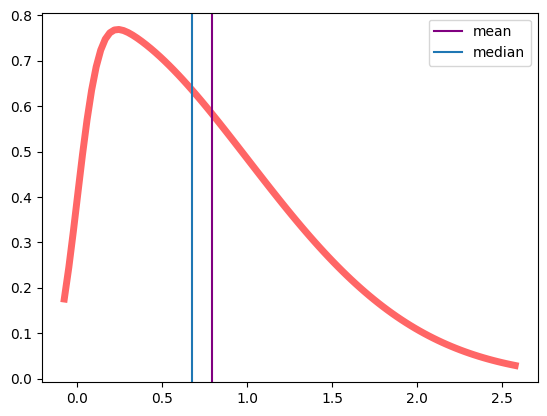

In [57]:
# Change this value to see how the skewed graph's mean and median compare
# Use values between -10 and 10
a = 10
generate_skewed_graph(a)

### Standard Deviation

Standard Deviation refers to how spread out the data is. A large standard deviation (compared to the mean) means data is spread over a wide area while a small standard deviation means data is packed tightly together. Let's visualize these differences with example graphs below. 

*Note these examples below are for Normal Standard Deviation, which is the most common.*

In [42]:
# Libraries to import
import matplotlib.pyplot as plt # For graphing
from scipy.stats import norm # For creating the normal distribution curve
from scipy.integrate import quad # For calculating the area under the curve
import numpy as np

In [43]:
# Since we aren't focused on visualization in this course, 
    # don't worry too much if you don't understand what is
    # going on in this function.
def graph_distribution(mean, stdev, stdev_away):
    domain = np.linspace(-10, 10, 10000)
    norm_range = norm.pdf(domain, mean, stdev)
    comparison_norm_range = norm.pdf(domain, mean, 1)
    
    def normal_distribution_function(x):
        value = norm.pdf(x,mean,stdev)
        return value

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.tight_layout(pad=5.0)
    ax1.plot(domain, norm_range, color='blue', alpha=1.0)
    ax1.fill_between(domain, norm_range, where=(domain<mean+stdev_away*stdev)&(domain>mean-stdev_away*stdev), color='green', alpha=0.2)
    ax1.set_ylim([0, 1])
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Probability')
    ax1.set_title(f'Standard Deviation of {stdev}', fontsize=10, fontweight="bold")
    
    ax2.plot(domain, comparison_norm_range, color='blue', alpha=1.0)
    ax2.fill_between(domain, comparison_norm_range, where=(domain<mean+stdev_away)&(domain>mean-stdev_away), color='green', alpha=0.2)
    ax2.set_ylim([0, 1])
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Probability')
    ax2.set_title('Standard Deviation of 1', fontsize=10, fontweight="bold")
    
    plt.show()
    
    area, error = quad(normal_distribution_function, mean-stdev_away*stdev, mean+stdev_away*stdev)
    print(f"{round(100*area, 1)}% of data is within {stdev_away} standard deviation(s) of {mean}")

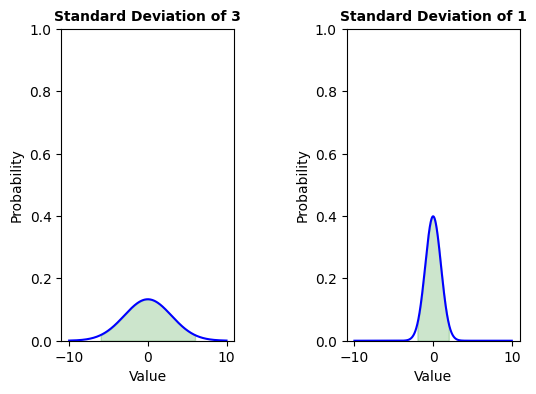

95.4% of data is within 2 standard deviation(s) of 0


In [55]:
mean=0

# Try changing to compare against a standard deviation of 1
stdev=3

# How many standard deviations away do we want to consider?
stdev_away=2

graph_distribution(mean, stdev, stdev_away)

### Correlation

Correlation looks for a linear pattern between two values. A positive correlation means as one value increases, the other increases. A negative correlation means as one value increases, the other decreases. Let's look at visual examples of correlation.

In [44]:
def graph_random_correlation(correl):
    x = np.array([0, 10])
    y = np.array([0, 10])
    means = [x.mean(), y.mean()]  
    stds = [x.std() / 3, y.std() / 3]
    covs = [[stds[0]**2, stds[0]*stds[1]*correl], 
            [stds[0]*stds[1]*correl, stds[1]**2]] 

    corr_points = np.random.multivariate_normal(means, covs, 1000).T
    plt.scatter(corr_points[0], corr_points[1])
    plt.title(f'Correlation of {correl}')
    plt.show()
    
    return corr_points[0], corr_points[1]

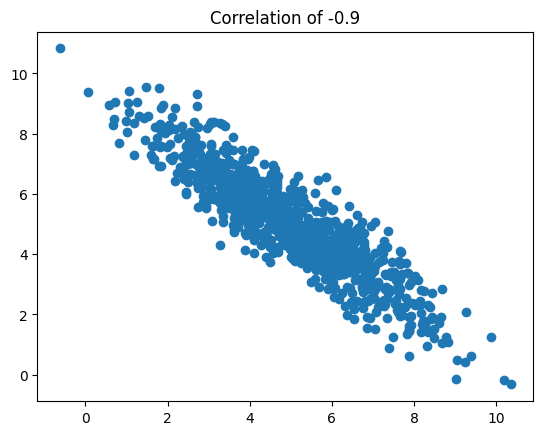

In [63]:
# Use this for a random correlation
#correlation = round(np.random.random() * (-1)**np.random.randint(0, 2), 2)
# Use this for a specific correlation
correlation = -0.9

x_vals, y_vals = graph_random_correlation(correlation)

In [61]:
# Calculate correlation from numpy arrays
import scipy.stats
corr_calc_narray = scipy.stats.pearsonr(x_vals, y_vals)[0]
print(f'Correlation: {corr_calc_narray}')

# Calculate correlation from Dataframe/Series
import pandas as pd
x_vals_series = pd.Series(x_vals) # Converting to Series object
y_vals_series = pd.Series(y_vals) # Converting to Series object
corr_calc_series = x_vals_series.corr(y_vals_series)
print(f'Correlation: {corr_calc_series}')

Correlation: 0.057575308202801725
Correlation: 0.05757530820280171
